# Environment setup

In [30]:
# ![ ! -f "DarioNet.pt" ] && wget -O DarioNet.pt https://github.com/rom42pla/aml_project/blob/main/assets/models/DarioNet.pt?raw=true
![ ! -f "DarioNet.pt" ] && wget -O DarioNet.pt https://github.com/rom42pla/aml_project/blob/main/assets/checkpoints/darionet_epoch_0.pt?raw=true
![ ! -f "RRDB.pth" ] && wget -O RRDB.pth https://github.com/rom42pla/aml_project/blob/main/assets/models/RRDB_PSNR_x4.pth?raw=true
![ ! -f "./blocks.py" ] && wget https://raw.githubusercontent.com/rom42pla/aml_project/main/blocks.py
![ ! -f "./models.py" ] && wget https://raw.githubusercontent.com/rom42pla/aml_project/main/models.py
![ ! -f "./utils.py" ] && wget https://raw.githubusercontent.com/rom42pla/aml_project/main/utils.py
![ ! -f "./RRDBNet_arch.py" ] && wget https://raw.githubusercontent.com/rom42pla/aml_project/main/RRDBNet_arch.py
![ ! -f "./parameters.json" ] && wget https://raw.githubusercontent.com/rom42pla/aml_project/main/parameters.json
![ ! -f "./labels.json" ] && wget https://raw.githubusercontent.com/rom42pla/aml_project/main/assets/labels.json

from blocks import RRDB, Classifier, Scaler
from models import Model1, Model2, Model3, Model4
from utils import read_json

--2021-01-23 09:46:33--  https://github.com/rom42pla/aml_project/blob/main/assets/checkpoints/darionet_epoch_0.pt?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/rom42pla/aml_project/raw/main/assets/checkpoints/darionet_epoch_0.pt [following]
--2021-01-23 09:46:33--  https://github.com/rom42pla/aml_project/raw/main/assets/checkpoints/darionet_epoch_0.pt
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rom42pla/aml_project/main/assets/checkpoints/darionet_epoch_0.pt [following]
--2021-01-23 09:46:33--  https://raw.githubusercontent.com/rom42pla/aml_project/main/assets/checkpoints/darionet_epoch_0.pt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githu

In [31]:
import re
import os
from os.path import isfile, join, basename, splitext
from pprint import pprint

from google.colab import files
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import torch
from torchvision import transforms

In [32]:
def plot_images_horizontally(imgs, titles, main_title=None):
    assert len(imgs) == len(titles)
    if len(imgs) > 4:
        fig, axs = plt.subplots(2, 3)
        fig.set_size_inches(20, 20)
    else:
        fig, axs = plt.subplots(1, len(imgs))
        fig.set_size_inches(14, 5)
    if main_title:
        fig.suptitle(main_title)
    for i, img in enumerate(imgs):
        axs.flat[i].set_title(titles[i])
        axs.flat[i].imshow(img.permute(1, 2, 0).to("cpu").numpy())
    plt.tight_layout()
    plt.savefig('Results.png')
    plt.show()

# Image upload

In [33]:
labels = read_json("labels.json")
pprint(labels)

{'0': 'tench, Tinca tinca',
 '1': 'goldfish, Carassius auratus',
 '10': 'brambling, Fringilla montifringilla',
 '100': 'black swan, Cygnus atratus',
 '101': 'tusker',
 '102': 'echidna, spiny anteater, anteater',
 '103': 'platypus, duckbill, duckbilled platypus, duck-billed platypus, '
        'Ornithorhynchus anatinus',
 '104': 'wallaby, brush kangaroo',
 '105': 'koala, koala bear, kangaroo bear, native bear, Phascolarctos cinereus',
 '106': 'wombat',
 '107': 'jellyfish',
 '108': 'sea anemone, anemone',
 '109': 'brain coral',
 '11': 'goldfinch, Carduelis carduelis',
 '110': 'flatworm, platyhelminth',
 '111': 'nematode, nematode worm, roundworm',
 '112': 'conch',
 '113': 'snail',
 '114': 'slug',
 '115': 'sea slug, nudibranch',
 '116': 'chiton, coat-of-mail shell, sea cradle, polyplacophore',
 '117': 'chambered nautilus, pearly nautilus, nautilus',
 '118': 'Dungeness crab, Cancer magister',
 '119': 'rock crab, Cancer irroratus',
 '12': 'house finch, linnet, Carpodacus mexicanus',
 '120':

In [43]:
# removes previous images
for filename in [f for f in os.listdir() if isfile(f) and not re.match(r".*.(pt|json|py)", f)]:
    os.remove(filename)
# uploads a new image
files.upload()

img_path = [f for f in os.listdir() if isfile(f) and not re.match(r".*.(pt|json|py)", f)][0]

Saving cavolfiore.jpg to cavolfiore.jpg


# Apply Super Resolution and prediction

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


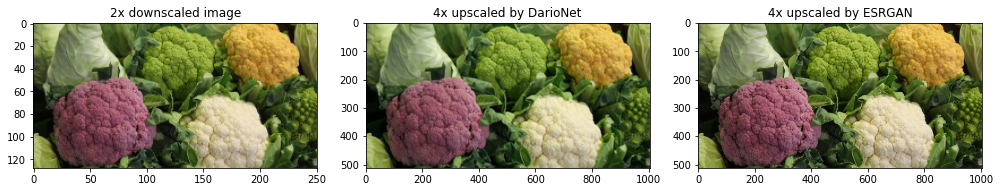

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


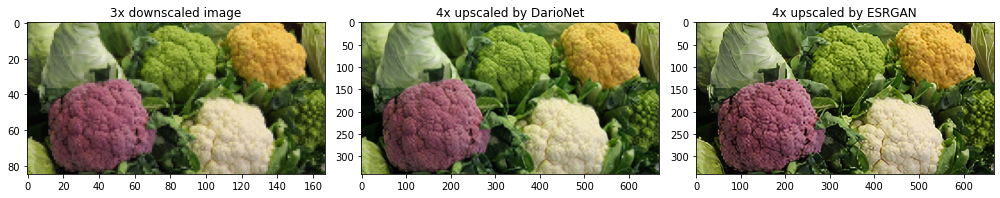

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


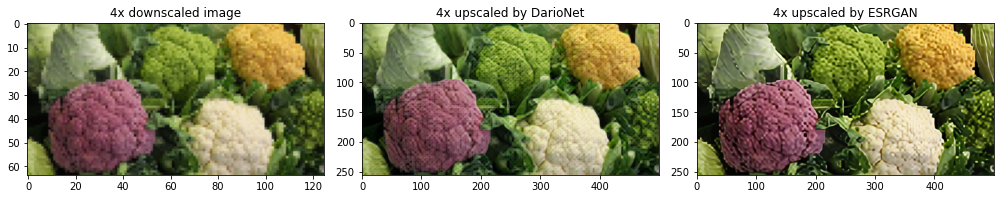

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


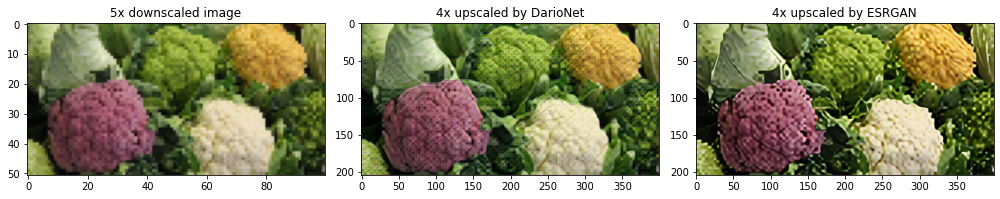

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


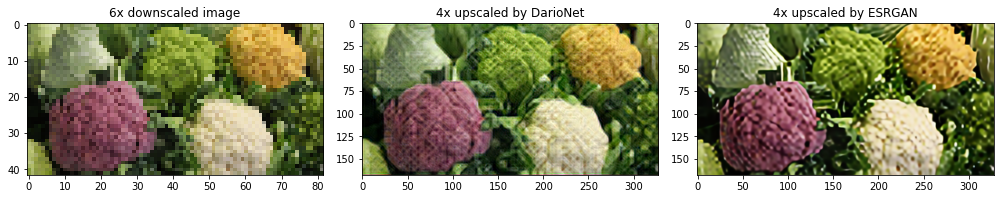

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


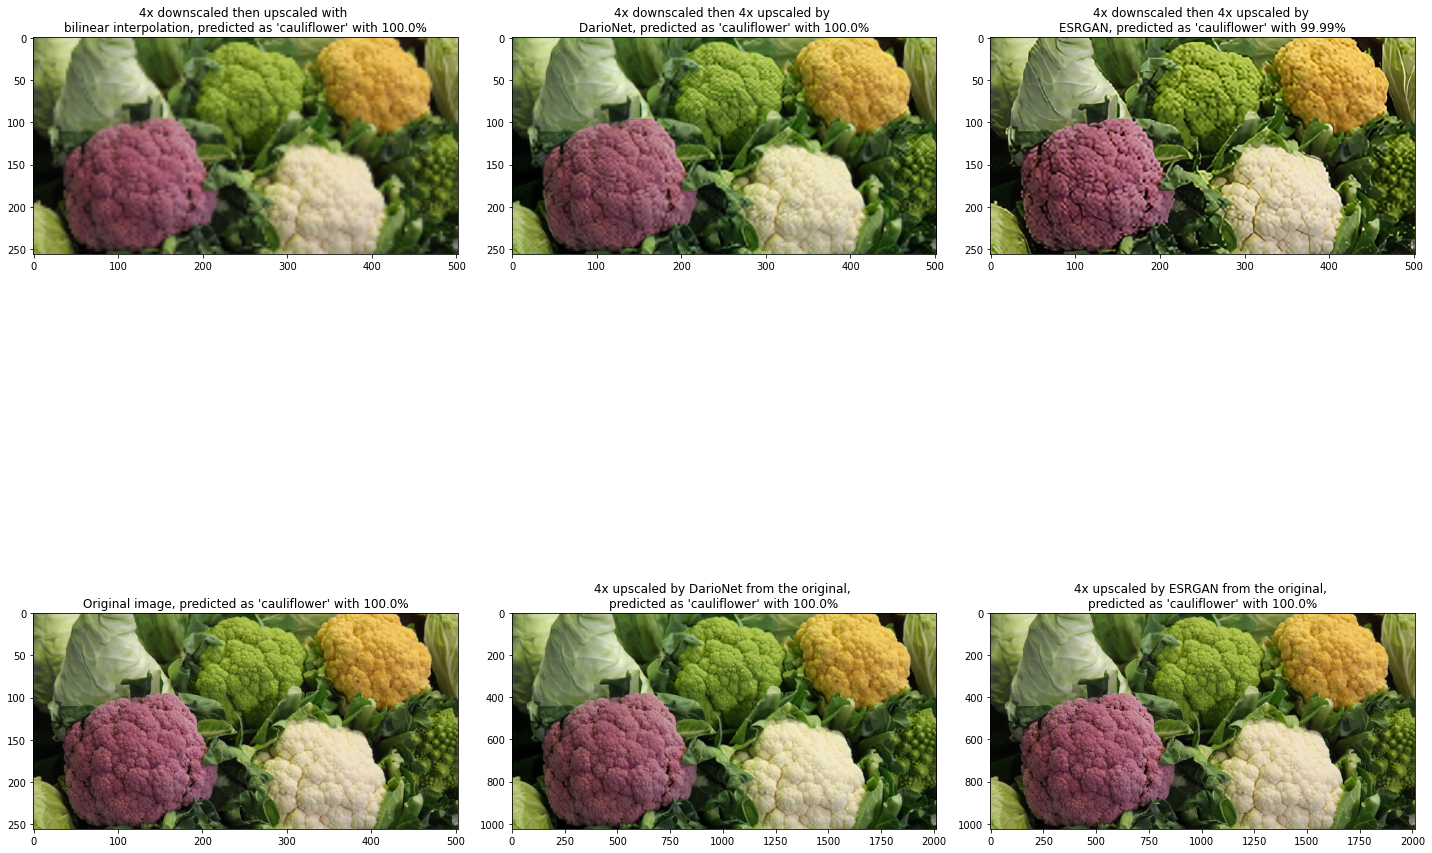

In [44]:
device = "cuda" if torch.cuda.is_available() else "cpu"

img = Image.open(img_path).convert('RGB')

# Images are scaled down to 256 pixel on the shortest side, in order to 
# make a meaningful comparison on the quality of images passed to the classifier.
# The super resolution works without this rescaling, but our hypothesis here
# is to keep from the original image only what's necessary for an accurate
# classification with Resnet. 
img = Scaler(256)(transforms.ToTensor()(img)).to(device)

# In order to make predictions with Resnet, we took CenterCrops of the
# same size of the shortest side. This is necessary so that the filters applied 
# by Resnet in its convolutional layers meet input images with same 
# dimensions.

classifier_transforms = transforms.Compose([transforms.ToPILImage(),
                                            transforms.Resize(256),
                                            transforms.CenterCrop(256),
                                            transforms.ToTensor()
                                            ])
# loads DarioNet
darionet_pretrained_model_path = join(".", "DarioNet.pt")
RRDB_path = join(".", "RRDB.pth")

# applies the super resolution
darionet = torch.load(darionet_pretrained_model_path).to(device)
rrdb = RRDB(pretrained_weights_path=RRDB_path)

with torch.no_grad():
    for scale in np.linspace(start=2, stop=6, endpoint=True, num=5, dtype=int):
        img_downscaled = Scaler(min(*img.shape[1:]) // int(scale))(img)
        try:
            img_downscaled_super_resolution = darionet(img_downscaled.unsqueeze(dim=0))[0]
            img_downscaled_super_RRDB = rrdb(img_downscaled.unsqueeze(dim=0))[0]
            plot_images_horizontally(imgs=[img_downscaled, img_downscaled_super_resolution, img_downscaled_super_RRDB], 
                                        titles=[f"{scale}x downscaled image", f"4x upscaled by DarioNet", f"4x upscaled by ESRGAN"])
        except Exception as e:
            print(e)
    try:
        # super resolution
        img_4x_downscaled = Scaler(min(*img.shape[1:]) // 3)(img)
        img_4x_downscaled_bilinear_upscale = Scaler(256)(Scaler(min(*img.shape[1:]) //3)(img))
        # Since the images are downscaled only by a factor of 0.32 (so a little less
        # than 3x), but the super resolution with esrgan outputs 4x upscaled images,
        # we downscale again to the size that should be passed to Resnet. So here
        # the 0.32 scale does not produce bigger output images, but is applied 
        # only to keep more details from the original image while downscaling. 
        img_4x_downscaled_super_resolution = Scaler(256)(darionet(img_4x_downscaled.unsqueeze(dim=0))[0])
        img_4x_downscaled_super_RRDB = Scaler(256)(rrdb(img_4x_downscaled.unsqueeze(dim=0))[0])
        
        img_super_resolution = darionet(img.unsqueeze(dim=0))[0]
        img_super_RRDB = rrdb(img.unsqueeze(dim=0))[0]
        # classification
        img_clas = classifier_transforms(img).to(device)
        
        img_4x_downscaled_clas = classifier_transforms(img_4x_downscaled).to(device) 
        img_4x_downscaled_bilinear_clas = classifier_transforms(img_4x_downscaled_bilinear_upscale).to(device)
        
        img_4x_downscaled_super_resolution_clas = classifier_transforms(img_4x_downscaled_super_resolution).to(device)
        img_4x_downscaled_super_RRDB_clas = classifier_transforms(img_4x_downscaled_super_RRDB).to(device)
        
        img_super_resolution_clas = classifier_transforms(img_super_resolution).to(device)
        img_super_RRDB_clas = classifier_transforms(img_super_RRDB).to(device)

        scores_original = torch.nn.functional.softmax(Classifier().eval()(img_clas.unsqueeze(0)).squeeze(), dim=0).detach().cpu()
        scores_reconstructed = torch.nn.functional.softmax(Classifier().eval()(img_4x_downscaled_super_resolution_clas.unsqueeze(0)).squeeze(), dim=0).detach().cpu()
        scores_reconstructed_RRDB = torch.nn.functional.softmax(Classifier().eval()(img_4x_downscaled_super_RRDB_clas.unsqueeze(0)).squeeze(), dim=0).detach().cpu()
        
        scores_downscaled = torch.nn.functional.softmax(Classifier().eval()(img_4x_downscaled_clas.unsqueeze(0)).squeeze(), dim=0).detach().cpu()
        scores_downscaled_bilinear = torch.nn.functional.softmax(Classifier().eval()(img_4x_downscaled_bilinear_clas.unsqueeze(0)).squeeze(), dim=0).detach().cpu()
        
        scores_super_resolution = torch.nn.functional.softmax(Classifier().eval()(img_super_resolution_clas.unsqueeze(0)).squeeze(), dim=0).detach().cpu()
        scores_super_RRDB = torch.nn.functional.softmax(Classifier().eval()(img_super_RRDB_clas.unsqueeze(0)).squeeze(), dim=0).detach().cpu()
        
        label_original = labels[str(torch.argmax(scores_original, dim=0).item())].split(",")[0]
        label_reconstructed = labels[str(torch.argmax(scores_reconstructed, dim=0).item())].split(",")[0]
        label_reconstructed_RRDB = labels[str(torch.argmax(scores_reconstructed_RRDB, dim=0).item())].split(",")[0]
        
        label_downscaled = labels[str(torch.argmax(scores_downscaled, dim=0).item())].split(",")[0]
        label_downscaled_bilinear = labels[str(torch.argmax(scores_downscaled_bilinear, dim=0).item())].split(",")[0]

        label_super_resolution = labels[str(torch.argmax(scores_super_resolution, dim=0).item())].split(",")[0]
        label_super_RRDB = labels[str(torch.argmax(scores_super_RRDB, dim=0).item())].split(",")[0]
        
        plot_images_horizontally(imgs=[img_4x_downscaled_bilinear_upscale, img_4x_downscaled_super_resolution, img_4x_downscaled_super_RRDB, 
                                       img, img_super_resolution, img_super_RRDB], 
                                 titles=[
                                         f"4x downscaled then upscaled with \nbilinear interpolation, predicted as '{label_downscaled_bilinear}' with {np.round(scores_downscaled_bilinear.max().item() * 100, 2)}%",
                                         
                                         f"4x downscaled then 4x upscaled by \nDarioNet, predicted as '{label_reconstructed}' with {np.round(scores_reconstructed.max().item() * 100, 2)}%", 
                                         f"4x downscaled then 4x upscaled by \nESRGAN, predicted as '{label_reconstructed_RRDB}' with {np.round(scores_reconstructed_RRDB.max().item() * 100, 2)}%", 
                                         
                                         f"Original image, predicted as '{label_original}' with {np.round(scores_original.max().item() * 100, 2)}%", 
                                         
                                         f"4x upscaled by DarioNet from the original, \npredicted as '{label_super_resolution}' with {np.round(scores_super_resolution.max().item() * 100, 2)}%",
                                         f"4x upscaled by ESRGAN from the original, \npredicted as '{label_super_RRDB}' with {np.round(scores_super_RRDB.max().item() * 100, 2)}%",
                                         ])
    except Exception as e:
            print(e)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


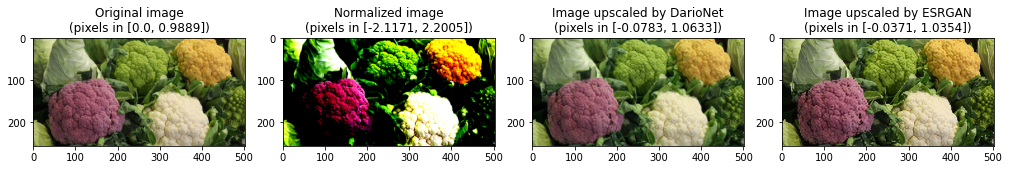

In [48]:
img_normalized = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                      std=[0.229, 0.224, 0.225])(img)
plot_images_horizontally(imgs=[img, img_normalized, img_4x_downscaled_super_resolution, img_4x_downscaled_super_RRDB], 
                        titles=[f"Original image\n(pixels in [{np.round(torch.min(img).item(), 4)}, {np.round(torch.max(img).item(), 4)}])", 
                                f"Normalized image\n(pixels in [{np.round(torch.min(img_normalized).item(), 4)}, {np.round(torch.max(img_normalized).item(), 4)}])",
                                f"Image upscaled by DarioNet\n(pixels in [{np.round(torch.min(img_4x_downscaled_super_resolution).item(), 4)}, {np.round(torch.max(img_4x_downscaled_super_resolution).item(), 4)}])",
                                f"Image upscaled by ESRGAN\n(pixels in [{np.round(torch.min(img_4x_downscaled_super_RRDB).item(), 4)}, {np.round(torch.max(img_4x_downscaled_super_RRDB).item(), 4)}])"])